In [3]:
from IPython import display

In [5]:
from IPython import display

In [7]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install keras

In [11]:
!pip install seaborn

In [15]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Updated absolute paths
base_path = r"C:\Users\RAVINANDAN\OneDrive\Desktop\Datasett"

train_files_healthy = os.path.join(base_path, "Train", "Train", "Healthy")
train_files_powdery = os.path.join(base_path, "Train", "Train", "Powdery")
train_files_rust = os.path.join(base_path, "Train", "Train", "Rust")

test_files_healthy = os.path.join(base_path, "Test", "Test", "Healthy")
test_files_powdery = os.path.join(base_path, "Test", "Test", "Powdery")
test_files_rust = os.path.join(base_path, "Test", "Test", "Rust")

valid_files_healthy = os.path.join(base_path, "Validation", "Validation", "Healthy")
valid_files_powdery = os.path.join(base_path, "Validation", "Validation", "Powdery")
valid_files_rust = os.path.join(base_path, "Validation", "Validation", "Rust")

# Checking if folders exist before counting files
def check_and_count(folder_path):
    if os.path.exists(folder_path):
        return total_files(folder_path)
    else:
        return f"Error: {folder_path} not found!"

print("Number of healthy leaf images in training set:", check_and_count(train_files_healthy))
print("Number of powder leaf images in training set:", check_and_count(train_files_powdery))
print("Number of rusty leaf images in training set:", check_and_count(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set:", check_and_count(test_files_healthy))
print("Number of powder leaf images in test set:", check_and_count(test_files_powdery))
print("Number of rusty leaf images in test set:", check_and_count(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set:", check_and_count(valid_files_healthy))
print("Number of powder leaf images in validation set:", check_and_count(valid_files_powdery))
print("Number of rusty leaf images in validation set:", check_and_count(valid_files_rust))


Number of healthy leaf images in training set: 458
Number of powder leaf images in training set: 430
Number of rusty leaf images in training set: 434
Number of healthy leaf images in test set: 50
Number of powder leaf images in test set: 50
Number of rusty leaf images in test set: 50
Number of healthy leaf images in validation set: 20
Number of powder leaf images in validation set: 20
Number of rusty leaf images in validation set: 20


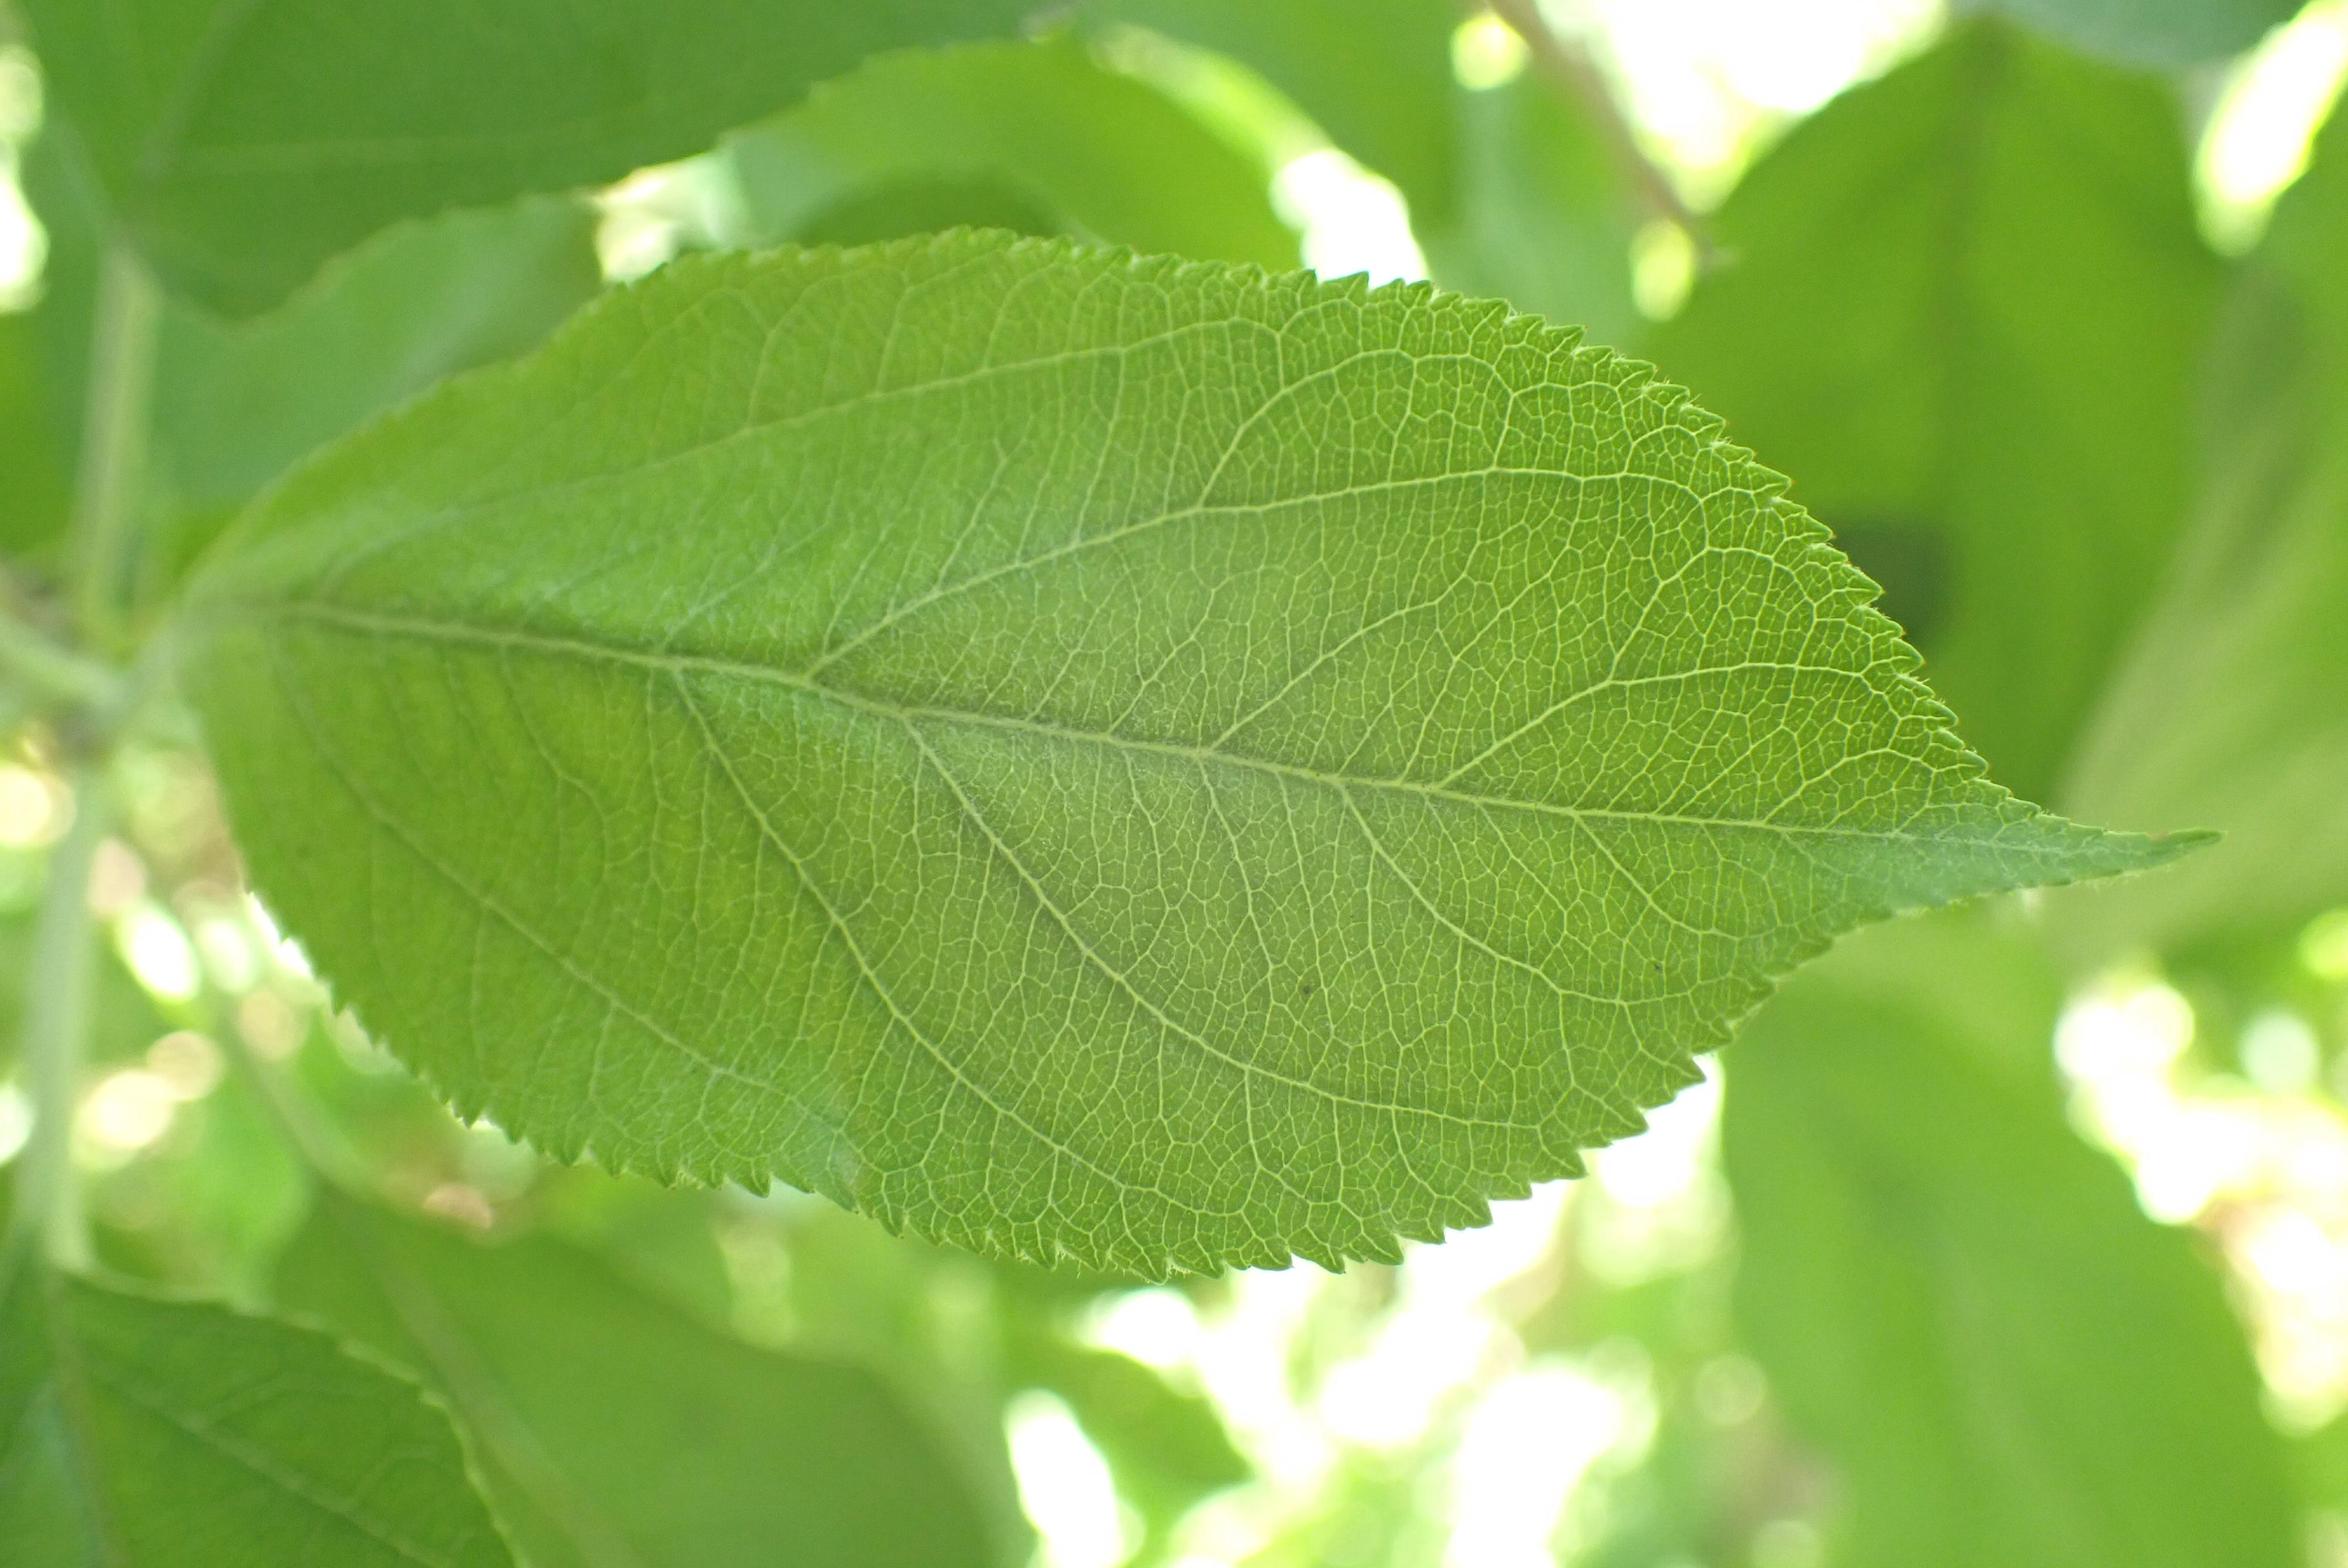

In [21]:
import os
from PIL import Image
import IPython.display as display

# Use an absolute path
image_path = r"C:\Users\RAVINANDAN\OneDrive\Desktop\Datasett\Train\Train\Healthy\9a6792be9da2b414.jpg"

# Check if the file exists before opening
if os.path.exists(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))
else:
    print(f"Error: File not found at {image_path}")


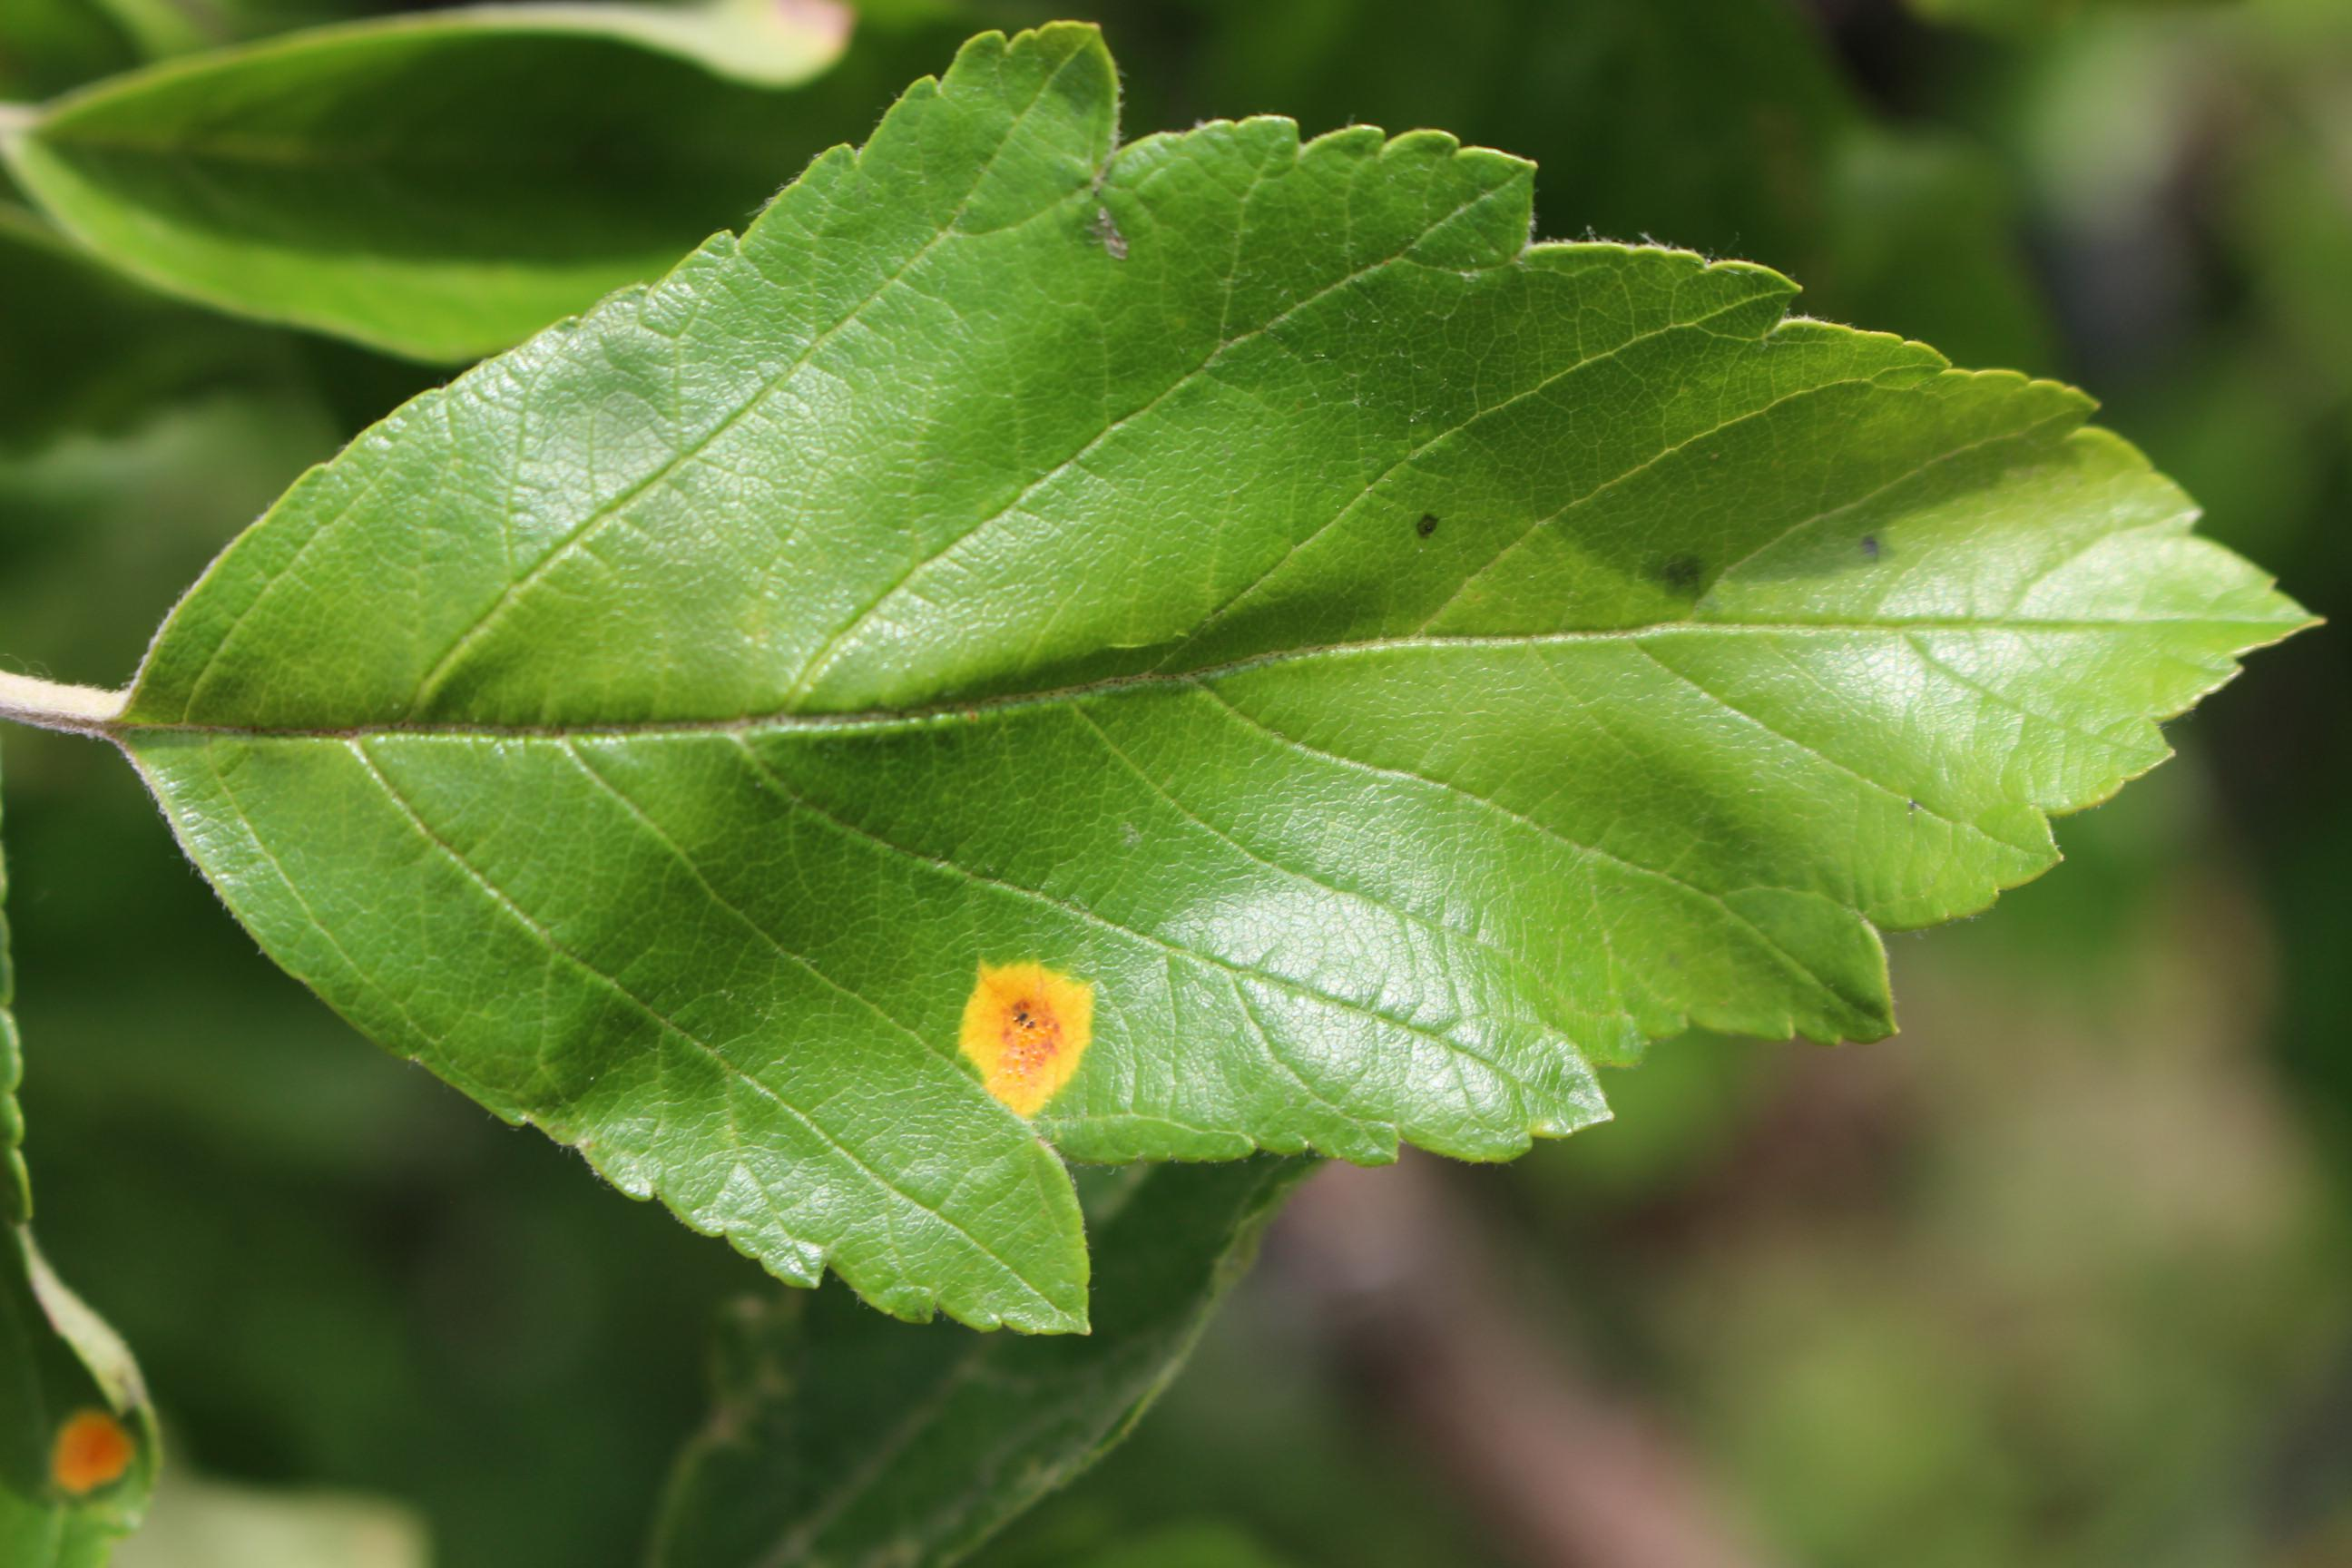

In [25]:
import os
from PIL import Image
import IPython.display as display

# Use an absolute path
image_path = r"C:\Users\RAVINANDAN\OneDrive\Desktop\Datasett\Test\Test\Rust\85e36e1b30afca61.jpg"

# Check if the file exists before opening
if os.path.exists(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))



In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths with absolute locations
train_dir = r"C:\Users\RAVINANDAN\OneDrive\Desktop\Datasett\Train\Train"
validation_dir = r"C:\Users\RAVINANDAN\OneDrive\Desktop\Datasett\Validation\Validation"

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Check if directories exist before loading data
import os
if not os.path.exists(train_dir):
    print(f"❌ Error: Training directory not found at {train_dir}")
if not os.path.exists(validation_dir):
    print(f"❌ Error: Validation directory not found at {validation_dir}")

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [35]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\RAVINANDAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

C:\Users\RAVINANDAN\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.3177 - loss: 5.4685 - val_accuracy: 0.3500 - val_loss: 1.0566
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6843 - loss: 0.6904 - val_accuracy: 0.8167 - val_loss: 0.5985
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8453 - loss: 0.4198 - val_accuracy: 0.7500 - val_loss: 0.5555
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.8866 - loss: 0.2767 - val_accuracy: 0.7333 - val_loss: 0.6187
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9452 - loss: 0.1813 - val_accuracy: 0.7500 - val_loss: 0.7022


In [42]:
pip install matplotlib

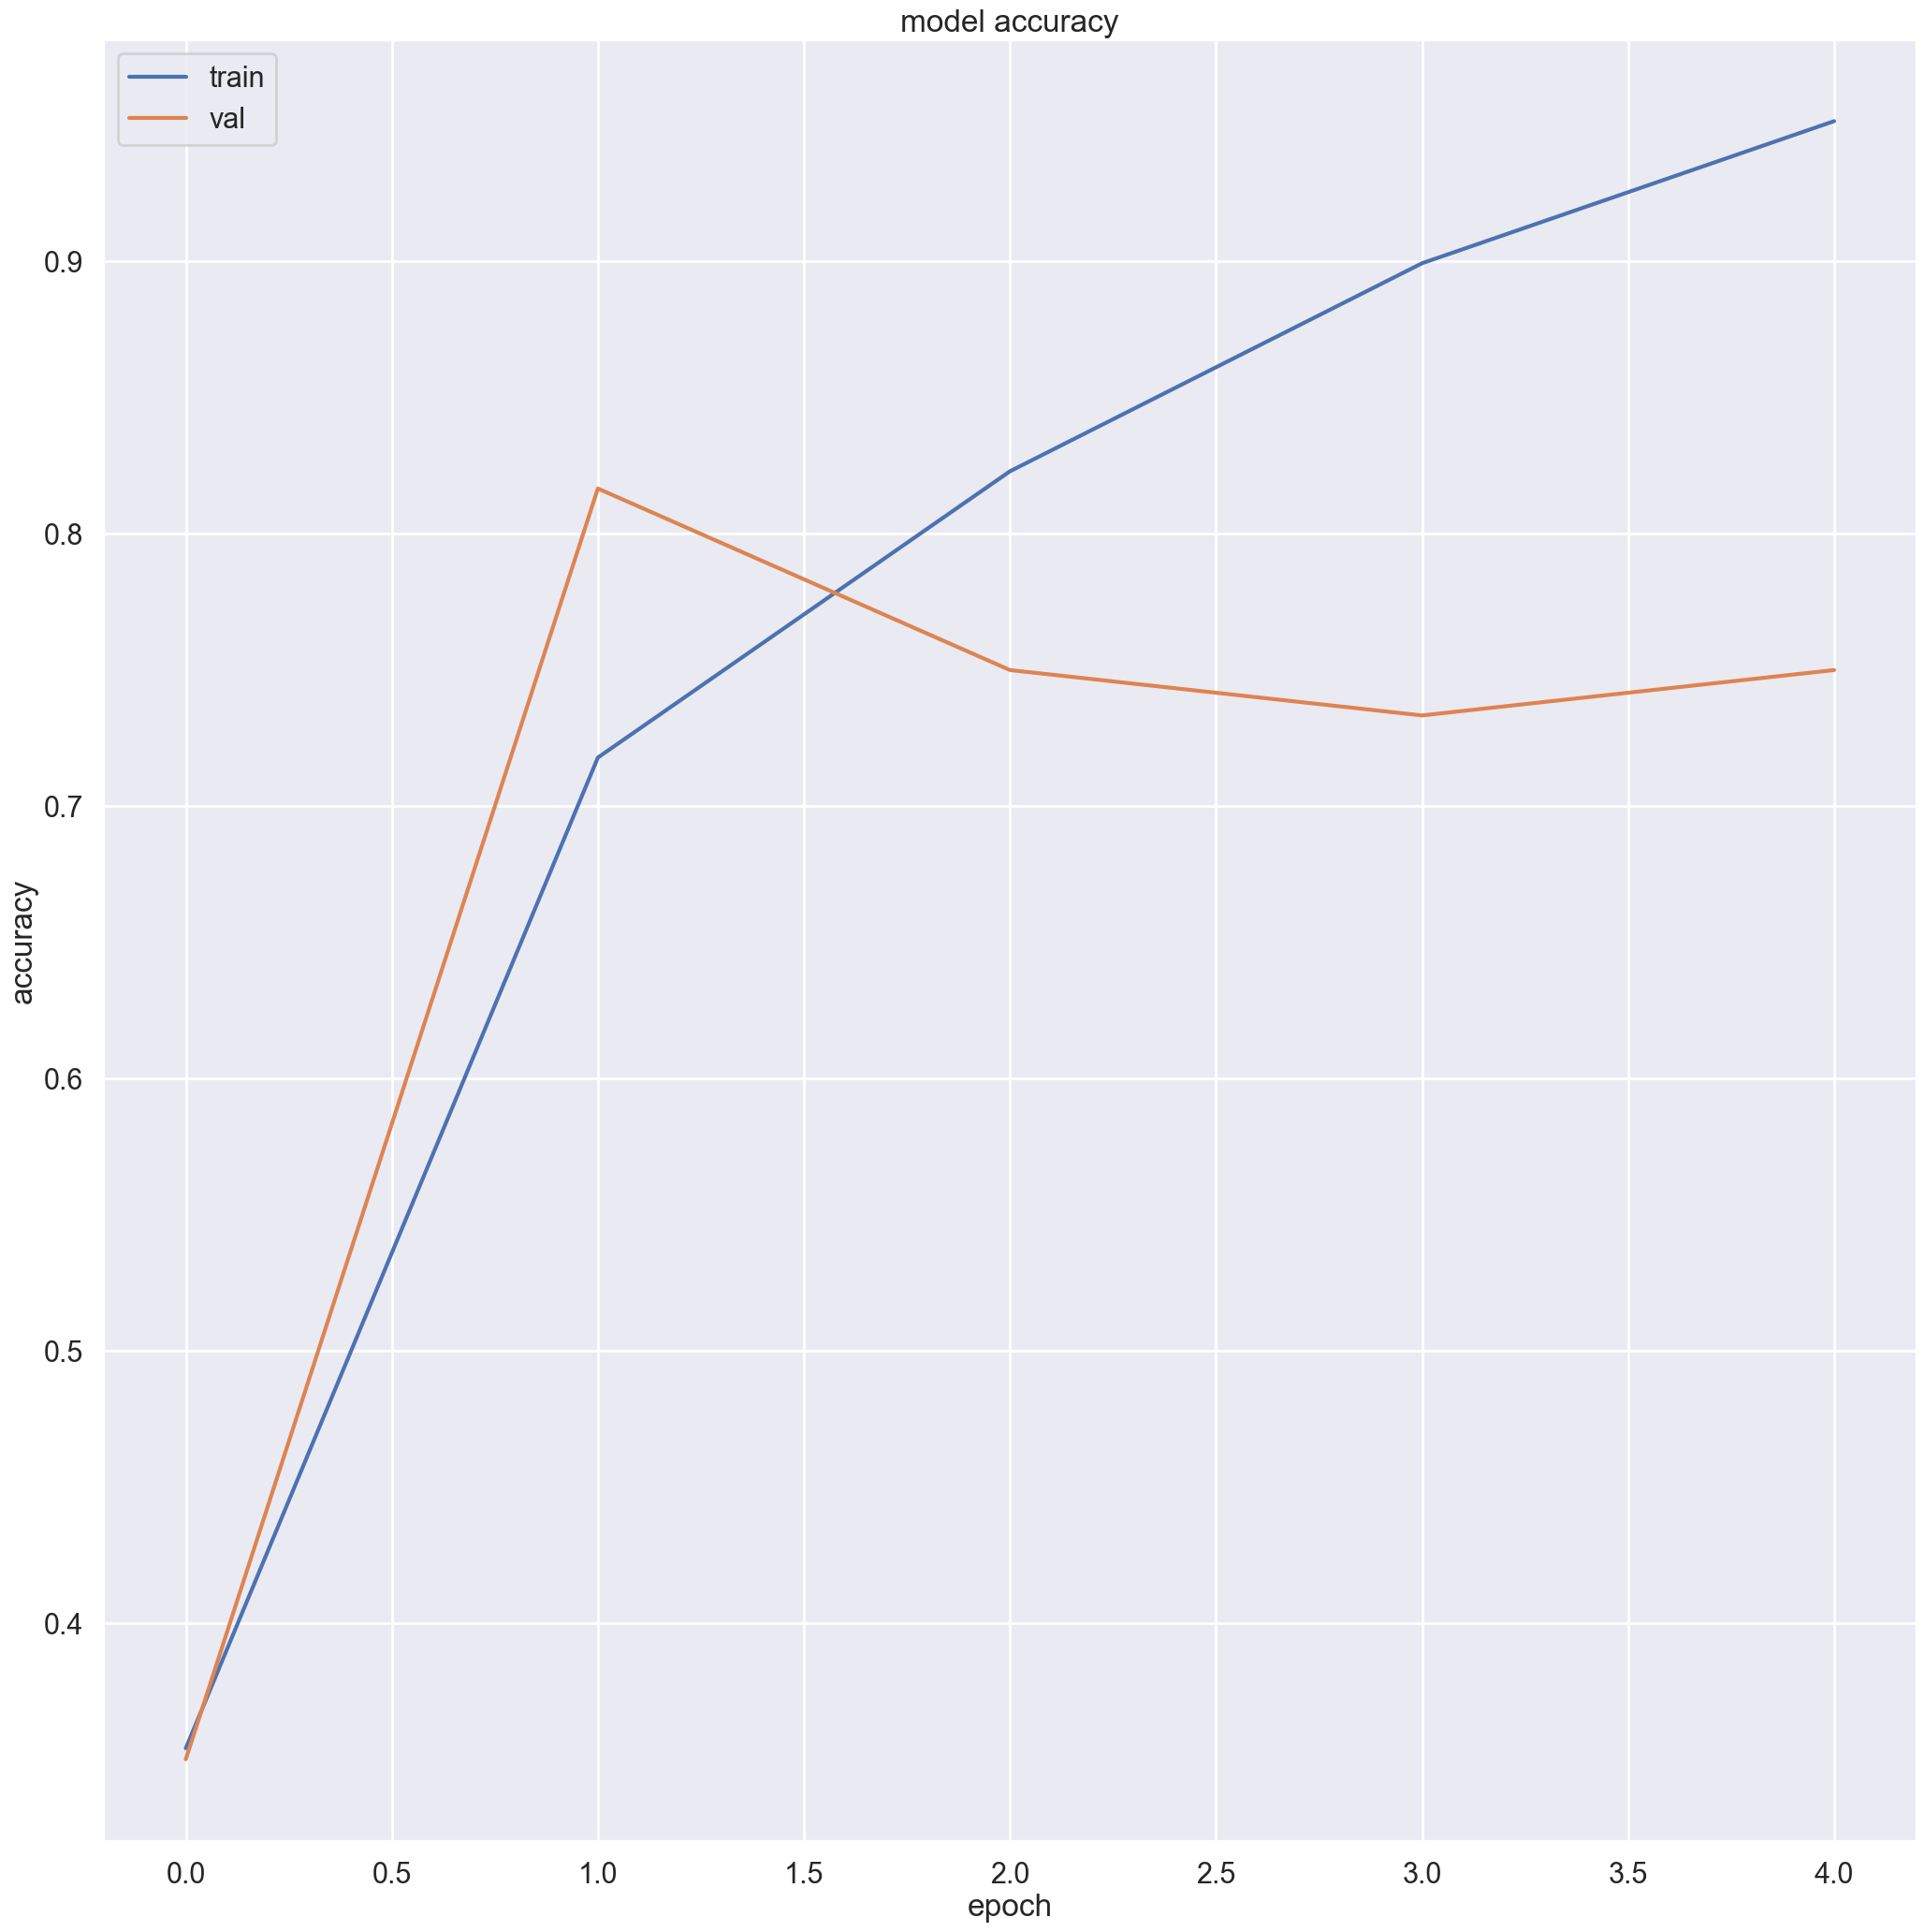

In [43]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Use an absolute path
image_path = r"C:\Users\RAVINANDAN\OneDrive\Desktop\Datasett\Test\Test\Rust\82f49a4a7b9585f1.jpg"

# Check if the file exists before processing
if os.path.exists(image_path):
    def preprocess_image(image_path, target_size=(225, 225)):
        img = load_img(image_path, target_size=target_size)
        x = img_to_array(img)
        x = x.astype('float32') / 255.  # Normalize
        x = np.expand_dims(x, axis=0)  # Expand dimensions for model input
        return x

    x = preprocess_image(image_path)
    print("✅ Image processed successfully!")
else:
    print(f"❌ Error: File not found at {image_path}")


✅ Image processed successfully!


In [51]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


array([1.3462329e-01, 4.5687659e-05, 8.6533099e-01], dtype=float32)

In [53]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [55]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
